In [13]:
%matplotlib inline

import numpy as np
from sklearn.manifold import TSNE
from torch.nn.utils.rnn import pad_sequence

from dataset import VietAlphabetDataset, id2label
from feature_extractor import wav2vec2
from models import fit_model, save_model

dataset = VietAlphabetDataset()

In [14]:
feature_vectors = []
labels = []

for waveform, label in dataset:
    feat = wav2vec2(waveform)

    feature_vectors.append(feat)
    labels.append(label)

feature_vectors = pad_sequence(feature_vectors, batch_first=True).numpy()
labels = np.asarray(labels)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5])

In [15]:
feature_vectors.shape, labels.shape

((141, 86), (141,))

In [16]:
model = fit_model(feature_vectors, labels)
save_model(model)

Iteration 1, loss = 2.08566737
Iteration 2, loss = 2.98698401
Iteration 3, loss = 2.07218695
Iteration 4, loss = 2.13688493
Iteration 5, loss = 2.09873605
Iteration 6, loss = 2.07945991
Iteration 7, loss = 2.07447124
Iteration 8, loss = 2.05559897
Iteration 9, loss = 2.04532099
Iteration 10, loss = 2.04335237
Iteration 11, loss = 2.02519488
Iteration 12, loss = 2.01448941
Iteration 13, loss = 2.00564075
Iteration 14, loss = 1.99126792
Iteration 15, loss = 1.97296166
Iteration 16, loss = 1.96006501
Iteration 17, loss = 1.95244062
Iteration 18, loss = 1.94271445
Iteration 19, loss = 1.93276608
Iteration 20, loss = 1.92211962
Iteration 21, loss = 1.91556787
Iteration 22, loss = 1.90960193
Iteration 23, loss = 1.90096593
Iteration 24, loss = 1.89585710
Iteration 25, loss = 1.89284956
Iteration 26, loss = 1.88612854
Iteration 27, loss = 1.88256729
Iteration 28, loss = 1.87969196
Iteration 29, loss = 1.87470651
Iteration 30, loss = 1.87078428
Iteration 31, loss = 1.86837876
Iteration 32, los

/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


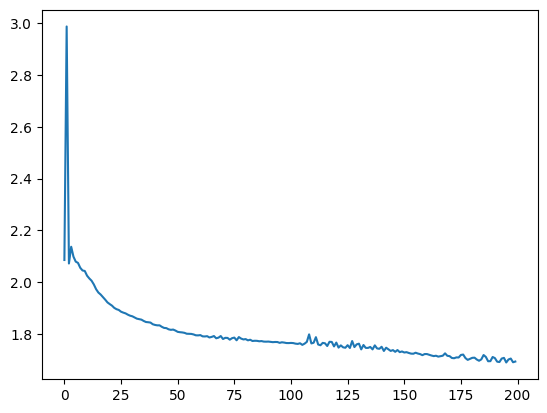

In [17]:
plt.plot(model.loss_curve_)

In [19]:
idx = 10
label = id2label(labels[idx])
proba = mlp.predict_proba(np.expand_dims(feature_vectors[idx], 0))
proba[:, labels[idx]]

array([0.14768142], dtype=float32)

In [20]:
labels[idx]

np.int64(0)

In [7]:
model = TSNE(
    n_components=2,
    verbose=2,
).fit_transform(np.asarray(feature_vectors))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 141 samples in 0.000s...
[t-SNE] Computed neighbors for 141 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 1.872073
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 46.7683372, gradient norm = 0.3864654 (50 iterations in 0.026s)
[t-SNE] Iteration 100: error = 46.5584602, gradient norm = 0.3027618 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 46.5196457, gradient norm = 0.3674369 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 47.1398926, gradient norm = 0.3375542 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 47.5185127, gradient norm = 0.2950214 (50 iterations in 0.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.518513
[t-SNE] Iteration 300: error = 0.0832369, gradient norm = 0.0021899 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.0720903, gradient norm = 0.0033564 (

In [8]:
import plotly.express as px

fig = px.scatter(model, x=0, y=1, color=labels)
fig.show()

In [13]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)